# Comparison of results

In [1]:
import pickle

#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import wilcoxon

In [10]:
def plot_fitness_evolution(ax, log):
    blue_patch = mpatches.Patch(color='tab:blue', label='CGP')
    orange_patch = mpatches.Patch(color='tab:orange', label='RV-CGP')
    
    cgp, pso = log
    ax.plot(np.mean(cgp, axis=0), label='CGP')
    
    ax1 = ax.twiny()
    
    ax1.plot(np.mean(pso, axis=0), label='PSO-CGP', color='tab:orange')
    ax1.set_yscale('log')
    
    ax.set_xlabel('Evaluations')
    ax.legend(handles=[blue_patch, orange_patch])
    
    ax.set_xticks([], [])
    ax1.set_xticks([], [])
    ax.set_xticks([0, 20000], [])
    ax.set_xticklabels(['0', '1e5'])
    return ax1

def get_final_fitnesses(logs):
    output = []
    for log in logs:
        output.append([x[-1] for x in log])
    return output

def load_log(bench_name, algos):
    results = []
    for algo in algos:
        try:
            data = pickle.load(open(f'results/{algo}/{bench_name}_log', 'rb'))
        except FileNotFoundError:
            data = [0]
        results.append(data)
        
    return results

def plot_histograms(data1, data2, **kw):
    _, ax = plt.subplots(1, 1)
    plot_to_axis(ax, data1, data2, **kw)
    return ax

def plot_to_axis(ax, data1, data2, **kw):
    sns.distplot(data1, kde=False, label='CGP', ax=ax, **kw)
    sns.distplot(data2, kde=False, label='RV-CGP', ax=ax, **kw)
    ax.set_xlabel('MSE')
    ax.legend()

# Results table

In [17]:
for bench in ['ng4', 'ng7', 'pag1', 'kei6', 'korns12', 'vlad4']:
    print(bench)
    data = load_log(bench, ['cgp', 'pso', 'abc'])
    mins = []
    meds = []
    for algo in data:
        np_algo = np.array(algo)
        mins.append(f'{np.min(np_algo):.2e}')
        meds.append(f'{np.median(np_algo):.2e}')
        
        
    print('min:\t', '\t'.join(mins))
    print('median:\t', '\t'.join(meds))

ng4
min:	 5.67e-06	0.00e+00	2.72e-03
median:	 2.59e-03	0.00e+00	2.69e-02
ng7
min:	 1.81e-06	0.00e+00	3.08e-05
median:	 6.80e-04	0.00e+00	2.33e-03
pag1
min:	 1.19e-32	0.00e+00	2.18e-01
median:	 9.89e-02	0.00e+00	2.09e+00
kei6
min:	 1.72e-06	0.00e+00	1.61e-03
median:	 2.33e-03	0.00e+00	4.80e-02
korns12
min:	 1.12e+00	0.00e+00	0.00e+00
median:	 1.12e+00	0.00e+00	0.00e+00
vlad4
min:	 5.62e-03	0.00e+00	0.00e+00
median:	 3.05e-02	0.00e+00	0.00e+00


# Distribution of best results

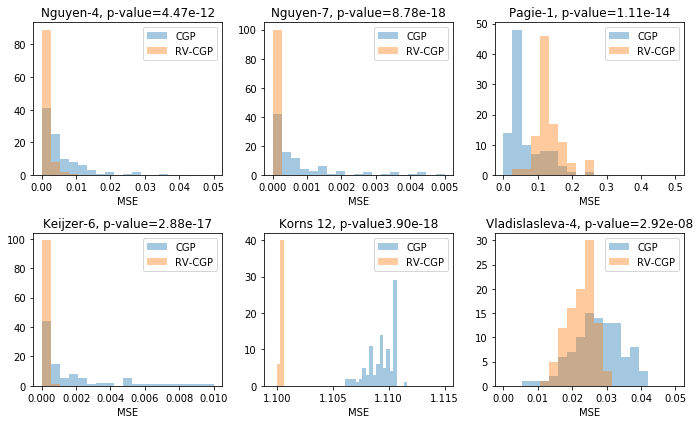

In [7]:
fig, axes = plt.subplots(2,3, figsize=(10, 6));


cgp, pso = get_final_fitnesses(load_log('ng4'))
axes[0][0].set_title(f'Nguyen-4, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[0][0], 
             cgp, 
             pso, bins=list(np.linspace(0, 0.05, 20)))


cgp, pso = get_final_fitnesses(load_log('ng7'))
axes[0][1].set_title(f'Nguyen-7, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[0][1], 
             cgp, 
             pso, bins=list(np.linspace(0, 0.005, 20)))

cgp, pso = get_final_fitnesses(load_log('pag1'))
axes[0][2].set_title(f'Pagie-1, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[0][2], 
             cgp, 
             pso, bins=list(np.linspace(0, 0.5, 20)))


cgp, pso = get_final_fitnesses(load_log('kei6'))
axes[1][0].set_title(f'Keijzer-6, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[1][0], 
             cgp, 
             pso, bins=list(np.linspace(0, 0.01, 20)))

cgp, pso = get_final_fitnesses(load_log('korns12'))
axes[1][1].set_title(f'Korns 12, p-value{wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[1][1], 
             cgp, 
             pso, bins=list(np.linspace(1.10, 1.115, 50)))

cgp, pso = get_final_fitnesses(load_log('vlad4'))
axes[1][2].set_title(f'Vladislasleva-4, p-value={wilcoxon(cgp, pso).pvalue:.2e}')
plot_to_axis(axes[1][2], 
             cgp, 
             pso, bins=list(np.linspace(0, 0.05, 20)))

for row in axes:
    for cell in row:
        cell.legend()

plt.tight_layout()

plt.savefig('distplots.pdf', format='pdf', dpi=1000)

# Fitness evolution

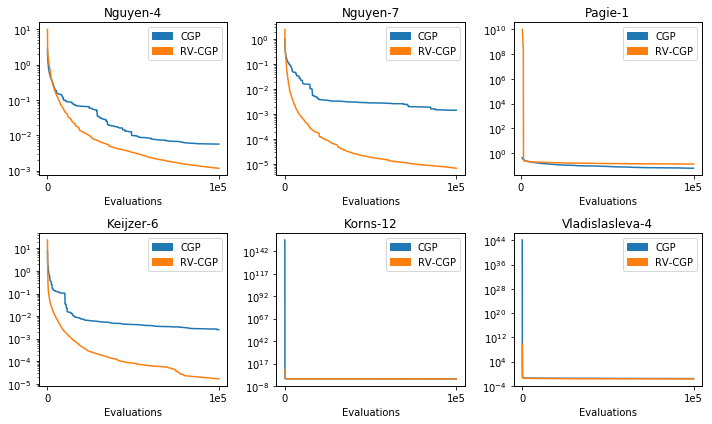

In [30]:
fig, axes = plt.subplots(2,3, figsize=(10, 6));

log = load_log('ng4')
plot_fitness_evolution(axes[0][0], log)
axes[0][0].set_title('Nguyen-4')

log = load_log('ng7')
plot_fitness_evolution(axes[0][1], log)
axes[0][1].set_title('Nguyen-7')

log = load_log('pag1')
plot_fitness_evolution(axes[0][2], log)
axes[0][2].set_title('Pagie-1')

log = load_log('kei6')
plot_fitness_evolution(axes[1][0], log)
axes[1][0].set_title('Keijzer-6')

log = load_log('korns12')
plot_fitness_evolution(axes[1][1], log)
axes[1][1].set_title('Korns-12')

log = load_log('vlad4')
plot_fitness_evolution(axes[1][2], log)
axes[1][2].set_title('Vladislasleva-4')


plt.tight_layout()

plt.savefig('fitness-evolution.pdf', format='pdf', dpi=1000)